In [1]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
import matplotlib.pyplot as plt

## Loading and splitting dataset

In [2]:
# Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42
)

print("Training set size:", X_train.shape)
print("Test set size:    ", X_test.shape)


Training set size: (353, 10)
Test set size:     (89, 10)


## Voting Regressor

In [ ]:
reg1 = LinearRegression()
reg2 = DecisionTreeRegressor(random_state=42)
reg3 = KNeighborsRegressor()

voting_reg = VotingRegressor(
    estimators=[("lr", reg1), ("dt", reg2), ("knn", reg3)]
)

voting_reg.fit(X_train, y_train)
y_pred_voting = voting_reg.predict(X_test)

mse_voting = mean_squared_error(y_test, y_pred_voting)
r2_voting = r2_score(y_test, y_pred_voting)

print("=== Voting Regressor ===")
print(f"MSE: {mse_voting:.2f}")
print(f"R^2: {r2_voting:.2f}").


## Bagging Regressor

In [8]:
bag_reg = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),
    n_estimators=50,  
    max_samples=0.8,       
    bootstrap=True,          
    random_state=42
)

bag_reg.fit(X_train, y_train)
y_pred_bagging = bag_reg.predict(X_test)

mse_bagging = mean_squared_error(y_test, y_pred_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)

print("\n=== Bagging Regressor ===")
print(f"MSE: {mse_bagging:.2f}")
print(f"R^2: {r2_bagging:.2f}")


=== Bagging Regressor ===
MSE: 3183.10
R^2: 0.40


## Boosting Regressor

In [9]:

ada_reg = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=3, random_state=42),
    n_estimators=50,
    learning_rate=0.1,
    random_state=42
)

ada_reg.fit(X_train, y_train)
y_pred_ada = ada_reg.predict(X_test)

mse_ada = mean_squared_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)

print("\n=== AdaBoost Regressor ===")
print(f"MSE: {mse_ada:.2f}")
print(f"R^2: {r2_ada:.2f}")


=== AdaBoost Regressor ===
MSE: 2804.06
R^2: 0.47


## Random Forest Feature Importance 


=== Random Forest Feature Importances ===
bmi: 0.3555
s5: 0.2310
bp: 0.0884
s6: 0.0713
age: 0.0586
s2: 0.0572
s1: 0.0528
s3: 0.0513
s4: 0.0242
sex: 0.0096


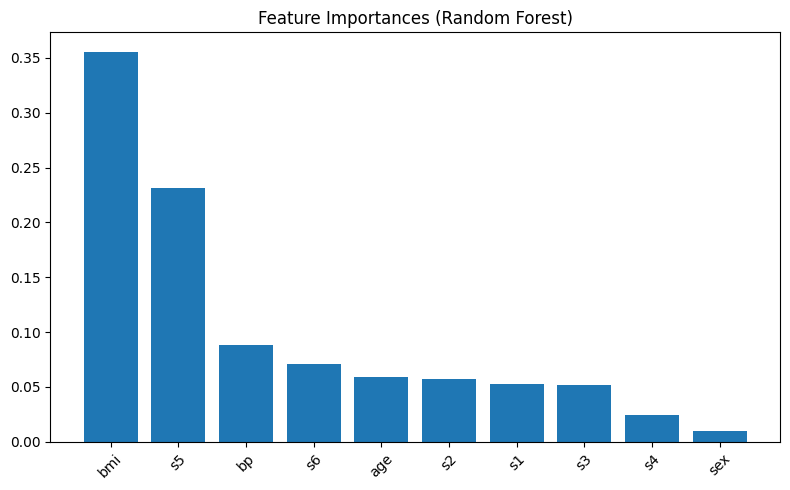

In [10]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]
feature_names = diabetes.feature_names
sorted_importances = importances[indices]
sorted_names = [feature_names[i] for i in indices]

print("\n=== Random Forest Feature Importances ===")
for name, imp in zip(sorted_names, sorted_importances):
    print(f"{name}: {imp:.4f}")

plt.figure(figsize=(8, 5))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_names, rotation=45)
plt.tight_layout()
plt.show()